# ArcGIS API for Python


## What is the Python API for ArcGIS?

<img src="./img/whatisit.jpg"/>

### What's Inside?

<img src="./img/guide_api_overview_modules.png" width=60%/>

- Tools to managing your GIS 
- Tool to perform spatial analysis
- Library for working with maps and geospatial data
- Powered by Web GIS
- Simple collection of tools 
- Raster/Vector Analysis
- Geocoding
- Routing/Directions
- Content/User Management
- Manages Infrastructure


## Why use the API?

- Popularity
- Productivity
- Interoperability
- Solves the “two-language” problem
- Scientific Python ecosystem
- Community

## Getting Started

### Import This!

In [1]:
from arcgis.gis import GIS

### Authentication Schemes

The `GIS` class in the ArcGIS API for Python supports several classes of users with varied authentication schemes:

#### Anonymous Users

You can make use of the Python API as anonymous user. 
    + Limited in Scope
    + Cannot create or modify content or perform any analysis tasks
    + View and query and view publicly shared maps and layers

In [2]:
GIS('https://esri.northeurope.cloudapp.azure.com/portal')

GIS @ https://esri.northeurope.cloudapp.azure.com/portal version:7.1

In [ ]:
gis = GIS(client_id='Ni3azRJBbW5raXd8') 
# gis = GIS(url="https://myportal.mydomain.com/portal")

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://www.arcgis.com/sharing/rest/oauth2/authorize?client_id=Ni3azRJBbW5raXd8&response_type=code&expiration=-1&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob


In [ ]:
gis

#### Built-in Accounts

- Uses the built-in default identity store. 
- Easily create an account
- Uses Username/Password 

In [ ]:
gis = GIS(profile='tech_trek_profile')

In [ ]:
gis

### Protecting Credentials

- Built-in obfuscation method
- Allows for securing username/password
- Leverages Operating System's password manager

#### Persistent profiles details

Persistent profiles will store any combination of the following GIS() parameters in the unencrypted .arcgisprofile file:

+ url
+ username
+ key_file
+ cert_file
+ client_id

In [5]:
from arcgis.gis import GIS
import getpass

In [7]:
gis = GIS(username='joshdbs', password=getpass.getpass(), profile="tech_trek_profile")
del gis

········


<User username:joshdbs>
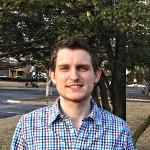

In [8]:
gis = GIS(profile='tech_trek_profile')
gis.users.me

### Handling SAML

- SAML or two-factor authentication you **MUST** leverage ArcGIS Pro OR Oauth 

## The GIS Object

<img src='https://developers.arcgis.com/assets/img/python-graphics/guide_gis_module_01.png' width=80% />

- This is the entry class to any Web GIS!
- From this object you access data, manage systems and users


### Properties

- Access the organization's  `properties`
- It includes information such as:
    + the name
    + logo
    + featured items
    + supported protocols


#### Accessing Properties



In [9]:
gis.properties

{
  "access": "public",
  "allSSL": true,
  "allowedRedirectUris": [],
  "analysisLayersGroupQuery": "title:\"Living Atlas Analysis Layers\" AND owner:esri",
  "authorizedCrossOriginDomains": [
    "https://bschaub.esri.com",
    "https://maps.chautauquacounty.com",
    "http://spatial.bom.gov.au",
    "https://spatial.bom.gov.au"
  ],
  "availableCredits": 27567.246,
  "backgroundImage": "none",
  "basemapGalleryGroupQuery": "title:\"ArcGIS Online Basemaps\" AND owner:esri_en",
  "canListApps": false,
  "canListConsultingServices": false,
  "canListData": false,
  "canListPreProvisionedItems": false,
  "canListSolutions": false,
  "canProvisionDirectPurchase": false,
  "canSearchPublic": true,
  "canSetCustomBuyLink": false,
  "canSetQuestionnaire": false,
  "canShareBingPublic": false,
  "canSharePublic": true,
  "canSignInArcGIS": true,
  "canSignInIDP": true,
  "colorSetsGroupQuery": "title:\"Esri Colors\" AND owner:esri_en",
  "commentsEnabled": true,
  "contentCategorySetsGroupQu

In [10]:
gis.properties.availableCredits

27567.246

#### Updating Properties

In [26]:
gis.update_properties(
    {
        'name' : "Pets of Esri"
    }
)

True

In [1]:
gis.properties.name

NameError: name 'gis' is not defined

### Visualizing Data

- The GIS object provide a web map integration for Jupyter Notebooks
- Allows for the viewing of data in a non-persistent way.  (Not Saved to Portal)

In [31]:
m = gis.map("Omaha, Nebraska")
m.basemap = 'dark-gray-vector'
m

MapView(layout=Layout(height='400px', width='100%'))

<Item title:"City Limits" type:Feature Layer Collection owner:Nataliya2>
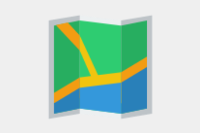

In [11]:
item = gis.content.search("Omaha, 'City Limits'", item_type="Feature Layer", outside_org=True, max_items=1)[0]
item

In [34]:
m.add_layer(item)

In [14]:
item.description

'City limits layer.\xa0'

In [35]:
m.extent = item.extent

#### Map Properties

- Zoom Level
- Map Center
- Basemap
- 3D Mode

**Listing the BaseMaps**

- Reference basemaps by the common name

In [36]:
m2 = gis.map("Omaha, Nebraska")
m2.basemaps

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

In [37]:
m2.basemap = 'streets-vector'

In [38]:
m2

MapView(layout=Layout(height='400px', width='100%'))

In [39]:
import time

for basemap in m2.basemaps:
    print(basemap)
    m2.basemap = basemap
    time.sleep(3)
print("FINISHED!")

dark-gray
dark-gray-vector
gray
gray-vector
hybrid
national-geographic
oceans
osm
satellite
streets
streets-navigation-vector
streets-night-vector
streets-relief-vector
streets-vector
terrain
topo
topo-vector
FINISHED!


#### Map center, Zoom and Extent

- The center property reveals the coordinates of the center of the map.
- Common extents can be used to set the view of the WebMap

```python

    mymap.extent = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'xmin': 8069559.307907475,
 'ymin': 2633577.6622019955,
 'xmax': 8078884.625358254,
 'ymax': 2637399.5136162494}

```

- Zoom moves to a define extend of the service
    + Normally bigger the number, the closer in you are zoomed.

In [74]:
m3 = gis.map()
m3.zoom = 14
m3

MapView(layout=Layout(height='400px', width='100%'), zoom=14.0)

In [75]:
m3.extent =  {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
              'xmin': 8069559.307907475,
              'ymin': 2633577.6622019955,
              'xmax': 8078884.625358254,
              'ymax': 2637399.5136162494
             }

In [76]:
m3.center

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'x': 0.6572117544710636,
 'y': -0.1599999964237213}

In [77]:
m3.center = [34,-118]

#### Move Map to a Specific Location 

In [80]:
from arcgis.geocoding import geocode
location = geocode("Times Square, NY", max_locations=1)[0]
xy = (location['location']['y'], location['location']['x'])
m3.center = xy

#### Viewing Data on a Map

- `add_layer` provides a way to visualize the following:

    + Items
    + Services
    + Spatially Enabled DataFrames
    
- Rendering information can optionally be given to override the default symbology

```python

freeway_feature_layer = flayer_search_result[-2].layers[0]
usa_map.add_layer(freeway_feature_layer, {"renderer":"ClassedSizeRenderer", "field_name": "DIST_MILES"})
```

In [83]:
m4 = gis.map("Omaha, NB")
m4.zoom = 4
m4

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)

<Item title:"USA Major Cities" type:Feature Layer Collection owner:esri_dm>
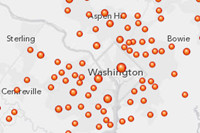

In [84]:
item = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
item

In [85]:
m4.add_layer(item=item)

**Remove the Layers**

In [86]:
m4.remove_layers(layers=m4.layers)

True

**Update the Symbology**

- Use Smart Mapping to Render the Cities 

In [87]:
#city
m4.add_layer(item, {"renderer":"ClassedSizeRenderer", "field_name": "HSE_UNITS"})

In [88]:
m4.legend = True

#### Saving a WebMap

- When logged in as a publisher account webmap can be persisted as `Item` on the enterprise

```python

m4.save(item_properties={'title' : "Housing Units Map",
                        'snippet' : "Housing Map",
                        'tags' : 'housing, units'})
```

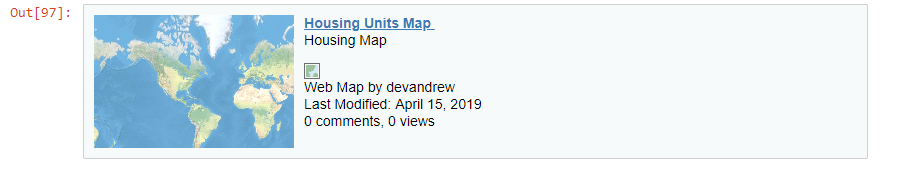

### Version

- It's always good to know what version of the REST API you are using

In [91]:
gis.version

[7, 1]

## Managing Content

<img src="./img/managing_content.png" />

### Searching

- `search` provides a way to access shared content
- Robust method that can limit by:
    + keyword
    + item type
    + sort results
    + limit number of return items


In [100]:
from arcgis.gis import GIS
gis = GIS(profile='tech_trek_profile')

- Accessing the Help

In [109]:
gis.content.search??

**Limiting Searches to Inside the Organization**

In [111]:
items = gis.content.search("*", item_type="Feature Layer", max_items=100, outside_org=False)
print("Number of Items: {n}".format(n=len(items)))

Number of Items: 0


**Limiting Searches to Inside and Outside the Organization**

In [112]:
items = gis.content.search("*", item_type="Feature Layer", max_items=100, outside_org=True)
print("Number of Items: {n}".format(n=len(items)))

Number of Items: 100


In [113]:
items = gis.content.search("title:census", outside_org=True, max_items=1000)
print("Number of Items: {n}".format(n=len(items)))

Number of Items: 1000


In [115]:
items[:5]

[<Item title:"USA Census Populated Places Areas" type:Layer Package owner:esri_dm>,
 <Item title:"USA Census Tract Boundaries" type:Layer Package owner:esri_dm>,
 <Item title:"California Census Tract Boundaries" type:Feature Layer Collection owner:Ferrar@FracTracker.org>,
 <Item title:"CDC’s Social Vulnerability Index (SVI) – 2014 overall SVI, census tract level" type:Feature Layer Collection owner:data_cdc>,
 <Item title:"2010 PL 94-171 Census data and Tiger Line Blocks" type:Layer Package owner:harrymoore>]

    + there is no way to specify return all items

**Limiting Searches by Item Type**

In [116]:
items = gis.content.search("*", item_type="Image Service", max_items=1000, outside_org=True)
print("Number of Items: {n}".format(n=len(items)))

Number of Items: 1000


**Question: How can we find out how many items were created and shared publicly yesterday on AGOL?**


In [117]:
# %load ./solutions/search.py
import datetime 
today = datetime.datetime.now()
yesterday = today - datetime.timedelta(days=1)
today = int(datetime.datetime.timestamp(today)) * 1000
yesterday = int(datetime.datetime.timestamp(yesterday)) * 1000
items = GIS().content.search("created: [{yesterday} TO {today}]".format(yesterday=yesterday, today=today), 
                             max_items=100000)
print("Number of Items: {n}".format(n=len(items)))

Number of Items: 6045


In [122]:
items[0]

<Item title:"eThekwini_Location" type:Web Map owner:PS.GEM18.uwespatial>

### Adding, Deleting, Publishing, and Updating Content

- Content drives a GIS system
    + Provides users a place to collaborate and share information
- Only users with publishing rights can create services
- Administrators can managing anyone's content

In [123]:
type(gis.content)

arcgis.gis.ContentManager

#### Adding Content

- `add()` uploads content to a GIS
- Returns an `Item`
- Item Properties - information about the item
    + title, type and tags are always **required**

In [125]:
item = gis.content.add(item_properties={
        "tags" : ["Tiger Census", "Counties", "FGDB"],
        "type" : "File Geodatabase",
        "title" : "Census County Featureclass"
        },
        data="./data/counties_demo.gdb.zip")
item

Item 'counties_demo.gdb.zip' already exists.


RuntimeError: Item 'counties_demo.gdb.zip' already exists.
(Error Code: 409)

#### Updating Items

- Allows for the modification of all `Item` properties
- Add metadata and/or thumbnails


In [1]:
item.update(thumbnail='./data/tiger_thumbnail.jpg')
item

NameError: name 'item' is not defined

#### Publishing Items

- Certain `Item` types can be published.
    + sd, Feature Classes, csv, etc...
- This creates a Hosted Feature Layer, Vector Tile, Tile Service

In [15]:
item.update?

<Item title:"Census County Featureclass" type:Feature Layer Collection owner:devandrew>
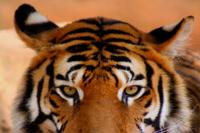

In [49]:
pitem = item.publish()
pitem

**Notice that the thumbnail and other information is past along the workflow**

In [50]:
m = gis.map("United States")
m

MapView(layout=Layout(height='400px', width='100%'))

In [51]:
m.extent = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'xmin': -15508693.373344794,
 'ymin': 2521206.203338205,
 'xmax': -5959568.303736833,
 'ymax': 6434782.051538189}
m.add_layer(pitem)

### Protecting and Sharing

- Provides the ability to disseminate data with `sharing`
- Protecting ensure content does not get erased!
    + There is **NO** undo button on AGOL/Enterprise

#### Protecting a Single Item

In [52]:
pitem.protect(enable=True)

{'success': True}

In [53]:
pitem.delete()

Unable to delete item. Delete protection is turned on.


RuntimeError: Unable to delete item. Delete protection is turned on.
(Error Code: 400)

In [54]:
pitem.protect(enable=False)
pitem.delete()

True

#### Sharing Content

**Question: Why is `sharing` important?**

Check the Item's sharing status:

In [55]:
item.access

'private'

In [56]:
item.share(everyone=True)
item.access

'public'

In [57]:
item.share(everyone=False, org=True)
item.access

'private'

In [58]:
item.delete()

True

### Creating Empty Services

- Create services without data or an item to publish from
- Fully customize schema via JSON

**1. Check if Service Name is Free**

In [59]:
gis.content.is_service_name_available("AprilDevSummit", service_type="featureService")

True

**2. Create an Empty Feature Service**

In [60]:
item = gis.content.create_service(name="AprilDevSummit")
item

<Item title:"AprilDevSummit" type:Feature Layer Collection owner:devandrew>

**3. Create a New Layer**

In [61]:
item.layers

[]

In [62]:
# Get the FS and the Manager
from arcgis.features import FeatureLayerCollection
fs = FeatureLayerCollection.fromitem(item)
mgr = fs.manager

In [63]:
mgr.properties

{
  "adminServiceInfo": {
    "name": "AprilDevSummit",
    "type": "FeatureServer",
    "cacheMaxAge": 0,
    "status": "Started",
    "database": {
      "datasource": {
        "name": "db"
      }
    }
  },
  "currentVersion": 10.7,
  "serviceItemId": "c58d80b64e4449d582c0b9150383fb48",
  "serviceDescription": "",
  "hasVersionedData": false,
  "supportsDisconnectedEditing": false,
  "hasStaticData": false,
  "maxRecordCount": 1000,
  "supportedQueryFormats": "JSON",
  "supportsVCSProjection": false,
  "capabilities": "Query",
  "description": "",
  "copyrightText": "",
  "spatialReference": {
    "wkid": 102100,
    "latestWkid": 3857
  },
  "initialExtent": {
    "xmin": -20037507.0671618,
    "ymin": -30240971.9583862,
    "xmax": 20037507.0671618,
    "ymax": 18398924.324645,
    "spatialReference": {
      "wkid": 102100,
      "latestWkid": 3857
    }
  },
  "fullExtent": null,
  "allowGeometryUpdates": true,
  "units": "esriMeters",
  "supportsAppend": true,
  "syncEnabled"

In [66]:
open("./data/layer.json", 'r').read()

'{"layers":[{"currentVersion":10.51,"id":0,"name":"CustomerLayer","type":"Feature Layer","displayField":"","description":"","copyrightText":"","defaultVisibility":true,"editingInfo":{"lastEditDate":1526947149828},"relationships":[],"isDataVersioned":false,"supportsAppend":true,"supportsCalculate":true,"supportsTruncate":true,"supportsAttachmentsByUploadId":true,"supportsAttachmentsResizing":true,"supportsRollbackOnFailureParameter":true,"supportsStatistics":true,"supportsAdvancedQueries":true,"supportsValidateSql":true,"supportsCoordinatesQuantization":true,"supportsApplyEditsWithGlobalIds":false,"supportsMultiScaleGeometry":true,"hasGeometryProperties":true,"geometryProperties":{"shapeAreaFieldName":"Shape__Area","shapeLengthFieldName":"Shape__Length","units":"esriMeters"},"advancedQueryCapabilities":{"supportsPagination":true,"supportsPaginationOnAggregatedQueries":true,"supportsQueryRelatedPagination":true,"supportsQueryWithDistance":true,"supportsReturningQueryExtent":true,"support

In [64]:
import json
with open("./data/layer.json", 'r') as reader:
    print(mgr.add_to_definition(json_dict=json.loads(reader.read())))

{'success': True, 'layers': [{'name': 'CustomerLayer', 'id': 0}]}


In [65]:
fs.layers

[<FeatureLayer url:"https://servicesdev.arcgis.com/01ClFLufh9nZafWR/arcgis/rest/services/AprilDevSummit/FeatureServer/0">]

In [67]:
item.delete()

True

### Cloning Content

<img src="./img/cloning.jpg" />

- Allows for the copying of Hosted Feature Layers and items from one site to another
- **WILL NOT** configure applications

**`clone_items` provides the ability to copy content from one site to another**

<img src="./img/clone_items.jpg" />

## Working with Users

<img src="./img/have-you-tried-turning-it-off-and-on-again.jpg" />

- The GIS object contains functionality to create, manage, and monitor users

### 10.6.x vs 10.7

- At **10.7** the user account types changed!  
- Levels essentially are deprecated and the concept of User Types were introduced
- Provides more flexibility in what a user can do.
- Python API for ArcGIS supports **BOTH** ways.

### Simple User Reports: `counts()` 

- simple report on the number of licenses currently used

In [ ]:
gis = GIS(profile='tech_trek_profile')
gis

In [ ]:
gis.users.counts?

In [69]:
df = gis.users.counts(type="user_type")
df

,count,key
0,8,creatorUT
1,3,standardUT


In [76]:
gis.users.roles.all()

[<Role name: content_viewer, description: View all content in arcgis online>,
 <Role name: Viewer, description: Viewer>,
 <Role name: Data Editor, description: Data Editor>]

**Getting Total User Count**

In [71]:
df = gis.users.counts(type="user_type")
df['count'].sum()

11

### Creating User

- `gis.users.create()` provides a seamless operation to generate new users
- Support Pre/Post 10.7 user generation 
    + one function for both platforms

**Example: Create a Level 1 Compatible User**

In [79]:
user = gis.users.create(username="AilDAadsf",
                password='Sch0II4r0ckslap',
                firstname="General",
                lastname="Account",
                email="gac@esri.com",
                role="iAAAAAAAAAAAAAAA",
                user_type="viewerUT")
user

<User username:AilDAadsf>

In [80]:
user.delete()

True

**Example: Creating a Content Creator**

In [81]:
user = gis.users.create(username="AilDAadsf",
                password='Sch0II4r0ckslap',
                firstname="General",
                lastname="Account",
                email="gac@esri.com",
                user_type='creatorUT')
user

<User username:AilDAadsf>

In [82]:
user.reset(new_security_question=1,
           new_security_answer="Redlands",
           password='Sch0II4r0ckslap',
           new_password="IMgoing2LA")

True

In [83]:
gis_new = GIS(url=gis._url, 
              username='AilDAadsf', password="IMgoing2LA", 
              set_active=False)
gis_new.users.me

<User username:AilDAadsf>

In [84]:
user.delete()

True

### Updating Users

- Like `Item` classes, users have `update()`


#### Updating User Properties

In [85]:
user = gis.users.create(username="bruce.account",
                password='dnc1ng1ntheDARK',
                firstname="Unknown",
                lastname="Account",
                email="gac@esri.com",
                role="iAAAAAAAAAAAAAAA",
                user_type="viewerUT")
user

<User username:bruce.account>

<User username:bruce.account>
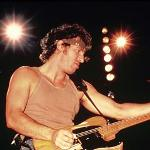

In [86]:
user.update(first_name="Bruce", last_name="Springsteen", thumbnail="./data/user_thumbnail.jpg")
user

**Question: How do we let Bruce create content?**

In [88]:
# %load ./solutions/update_user_type.py
print((user.userLicenseTypeId, user.role))
user.update_license_type(user_type="creatorUT")
user.update_role("org_publisher")
print((user.userLicenseTypeId, user.role))


('viewerUT', 'org_user')
('creatorUT', 'org_publisher')


**Question: How do you add content to a user?**

In [90]:
# %load ./solutions/add_user_content.py
fp = "./data/rivers.gdb.zip"
item_properties = {
    'title' : "US Rivers",
    'type' : 'File Geodatabase',
    'tags' : ['Rivers']
}
river_item = gis.content.add(data=fp, item_properties=item_properties, owner=user)
p_river = river_item.publish()
p_river


<Item title:"US Rivers" type:Feature Layer Collection owner:bruce.account>

### Accessing User Content

### Searching for Users


- `search` provides the ability to find users
- Locates both system and user accounts

In [91]:
users = gis.users.search("bruce*")
users

[<User username:bruce.account>]

### List a User's Content

- Each User's content can be paged over

In [92]:
items = users[0].items()
items

[<Item title:"US Rivers" type:File Geodatabase owner:bruce.account>,
 <Item title:"US Rivers" type:Feature Layer Collection owner:bruce.account>]

### Reassigning Content

- If a user has data, it can be re-assigned to a new user

In [93]:
for item in users[0].items():
    if item.type == "Feature Service":
        print(item.reassign_to(target_owner=gis.users.me.username))
users[0].items()

True


[]

### Deleting Users

In [94]:
users[0].delete()

True

In [95]:
gis.users.search("bruce")

[]

## Group Manager

### The Group

<img src="./img/groups.jpeg" />

- `GroupManager` provides tools to manage groups
    + create
    + update
    + delete
    + management content

In [96]:
type(gis.groups)

arcgis.gis.GroupManager

### Searching for Groups

In [97]:
agol_gis = GIS(profile='agol_profile')
agol_gis.groups.search(query="Complianc*")

[<Group title:"Compliance" owner:MikeSolutions>,
 <Group title:"Compliance" owner:ClareSolutions>,
 <Group title:"Corporate Management" owner:UtilitySolutions>,
 <Group title:"Corporate Management" owner:MikeSolutions>,
 <Group title:"Regulatory Compliance" owner:MikeSolutions>]

### Managing Groups

#### Creating a Group

In [98]:
group = gis.groups.create(title="AprilDemoGroup",
                  tags=['demo', 'eraseme'], 
                  is_invitation_only=False,
                  auto_join=True)
group

<Group title:"AprilDemoGroup" owner:andrew>

<Group title:"AprilDemoGroup" owner:andrew>
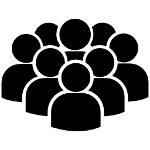

In [99]:
group.update(thumbnail=r"./data/group-icon.png")
group

#### Assigning Items to Group

In [100]:
item = gis.users.me.items()[0]
item.share(groups=[group])
item.shared_with

{'everyone': False,
 'org': False,
 'groups': [<Group title:"AprilDemoGroup" owner:andrew>]}

#### Adding Users to Group

In [101]:
group.add_users(usernames=[gis.users.search("*")])

{'notAdded': []}

#### Deleting a Group

In [102]:
group.delete()


True

## Command Line Scripting Demo

- This demo will cover how the users were created via command line using the Python API.

## Complete Hands On Assignment 1
## 15 Minutes